# Clustering

This notebook will contain some homework questions about $k$ mmeans clustering  and hiearchical clustering.

In [1]:
## For data handling
import numpy as np
import pandas as pd

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("white")

##### 1. $k$ means random initialization

Recall that $k$ means clustering starts by choosing an initial guess for $k$ centroids. This is typically done with a random guess. Because $k$ means clustering is a greedy algorithm, there is no guarantee that the resulting clusters are identical across separate runs (unless you set a random seed). Moreover, this means that some random initial centroids may result in "better" clusterings than others, where we take better to mean lower inertia.

A common approach to deal with this is to run the algorithm multiple times with a different random initial set of centroids each time, and then choose the run that provided the lowest inertia.

In `sklearn` the default is to run the $k$ means algorithm $10$ times, however, this can be changed with the `n_init` argument.

Generate the following data and then manually run the clustering $10$ times. Do this by fitting $10$ unique `KMeans` objects with `n_init = 1`. Which clustering has the lowest inertia, the highest average silhouette score? Set $k=3$.

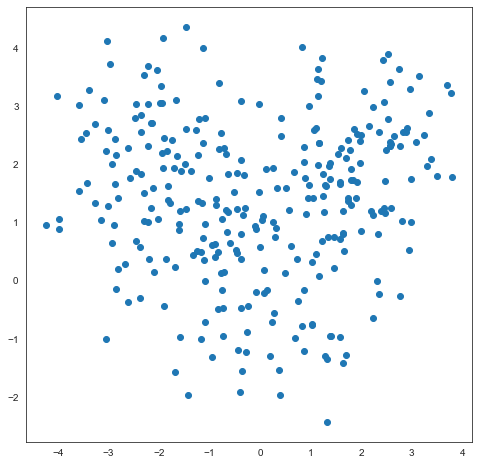

In [2]:
X = np.zeros((300,2))

X[:100,:] = np.random.randn(100,2)
X[100:200,:] = np.random.randn(100,2) + np.array([2, 2])
X[200:,:] = np.random.randn(100,2) + np.array([-2, 2])

plt.figure(figsize=(8,8))

plt.scatter(X[:,0], X[:,1])

plt.show()

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
kmeans1 = KMeans(3, n_init=1).fit(X)
kmeans2 = KMeans(3, n_init=1).fit(X)
kmeans3 = KMeans(3, n_init=1).fit(X)
kmeans4 = KMeans(3, n_init=1).fit(X)
kmeans5 = KMeans(3, n_init=1).fit(X)
kmeans6 = KMeans(3, n_init=1).fit(X)
kmeans7 = KMeans(3, n_init=1).fit(X)
kmeans8 = KMeans(3, n_init=1).fit(X)
kmeans9 = KMeans(3, n_init=1).fit(X)
kmeans10 = KMeans(3, n_init=1).fit(X)

models = [kmeans1, kmeans2, kmeans3, kmeans4, kmeans5,
             kmeans6, kmeans7, kmeans8, kmeans9, kmeans10]

In [5]:
for i in range(len(models)):
    print("Model",i,"inertia:",models[i].inertia_)
    print("Model",i,"silhoutte score:",silhouette_score(X, models[i].predict(X)))
    print()

Model 0 inertia: 520.2154159350596
Model 0 silhoutte score: 0.4348453522741595

Model 1 inertia: 520.2154159350596
Model 1 silhoutte score: 0.4348453522741595

Model 2 inertia: 520.2559797244767
Model 2 silhoutte score: 0.4338931319818876

Model 3 inertia: 520.4916314392544
Model 3 silhoutte score: 0.4309058530665389

Model 4 inertia: 520.2154159350596
Model 4 silhoutte score: 0.4348453522741595

Model 5 inertia: 520.2559797244767
Model 5 silhoutte score: 0.4338931319818876

Model 6 inertia: 520.4916314392544
Model 6 silhoutte score: 0.4309058530665389

Model 7 inertia: 520.4916314392544
Model 7 silhoutte score: 0.4309058530665389

Model 8 inertia: 520.0237060889258
Model 8 silhoutte score: 0.4334931491949618

Model 9 inertia: 520.2559797244767
Model 9 silhoutte score: 0.4338931319818876



##### 2. Return to MNIST

In this problem we will play around with the MNIST data set (alternatively you could play around the MNIST of fashion if you prefer).

First load the keras version of the MNIST data set.

In [6]:
## Import the MNIST data here
from keras.datasets import mnist

In [7]:
## Load the data here
(X_train,y_train),(X_test,y_test) = mnist.load_data()

## reshape the training data so there are 60000 rows of 28*28 columns
## Also scale the data by dividing by 255
X_train = X_train.reshape(60000, 28*28)/255

Run the training data through $k$ means clustering with $50$ clusters.

In [8]:
kmeans = KMeans(50, random_state=440)

kmeans.fit(X_train)

KMeans(n_clusters=50, random_state=440)

We can think of the centers of each resulting cluster as the "average" image for that cluster. It can be interesting to look at this image to see what kinds of observations are represented in this cluster.

Choose a few of the clusters and use `imshow` to plot their corresponding `cluster_centers_`. At the same time calculate the percentage of each image type (digit for MNIST, fashion item for the fasion MNIST) in that cluster.

In [9]:
def cluster_percs(X, y, cluster, kmeans, labels=None):
    digit_percs = []
    for i in range(10):
        digit_percs.append(100*sum(y[kmeans.predict(X)==cluster] == i)/sum(kmeans.predict(X)==cluster))
    return pd.DataFrame({'label':range(10),
                           'perc_of_cluster':digit_percs})

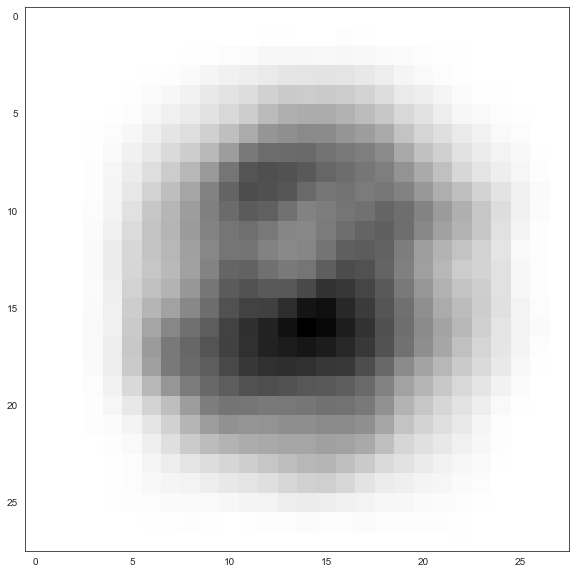

,label,perc_of_cluster
0,0,5.259823
1,1,2.091255
2,2,24.524715
3,3,6.717364
4,4,12.420786
5,5,15.906210
6,6,10.773131
7,7,8.238276
8,8,8.745247
9,9,5.323194


In [10]:
cluster = 1

plt.figure(figsize=(14,10))

plt.imshow(kmeans.cluster_centers_[cluster].reshape(28,28), cmap='binary')

plt.show()

cluster_percs(X_train, y_train, cluster, kmeans)

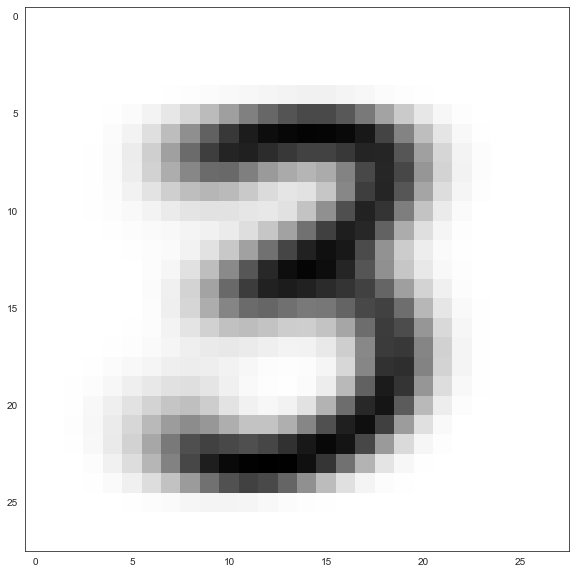

,label,perc_of_cluster
0,0,0.000000
1,1,0.000000
2,2,0.279590
3,3,92.078285
4,4,0.000000
5,5,0.465983
6,6,0.000000
7,7,0.000000
8,8,5.591799
9,9,1.584343


In [11]:
cluster = 9

plt.figure(figsize=(14,10))

plt.imshow(kmeans.cluster_centers_[cluster].reshape(28,28), cmap='binary')

plt.show()

cluster_percs(X_train, y_train, cluster, kmeans)

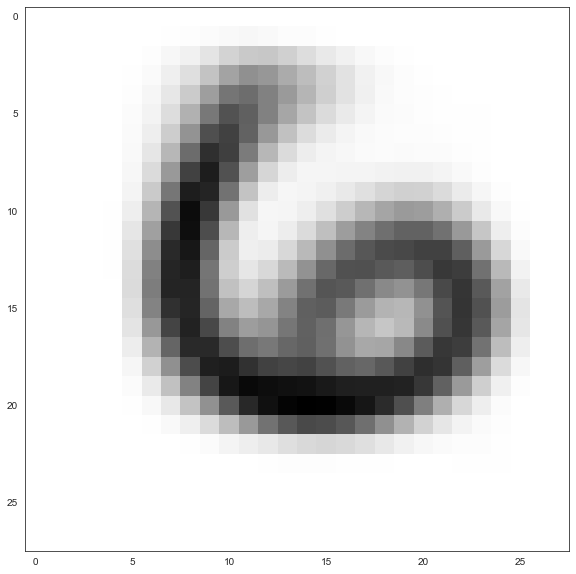

,label,perc_of_cluster
0,0,3.850782
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,1.083032
5,5,0.240674
6,6,94.103490
7,7,0.000000
8,8,0.361011
9,9,0.361011


In [12]:
cluster = 28

plt.figure(figsize=(14,10))

plt.imshow(kmeans.cluster_centers_[cluster].reshape(28,28), cmap='binary')

plt.show()

cluster_percs(X_train, y_train, cluster, kmeans)

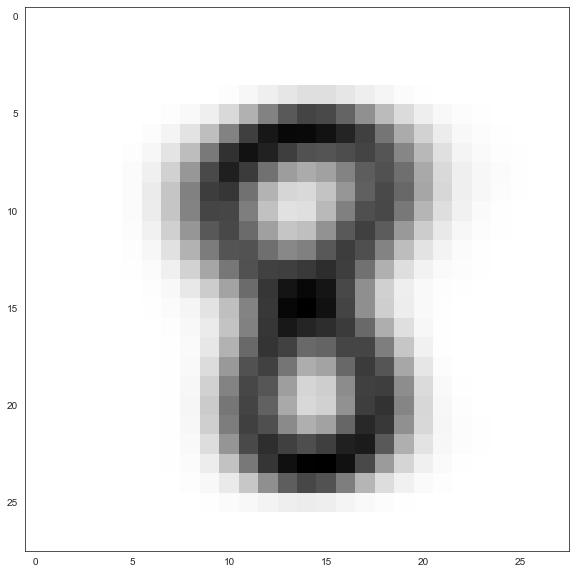

,label,perc_of_cluster
0,0,0.948617
1,1,0.316206
2,2,3.794466
3,3,4.901186
4,4,0.079051
5,5,3.399209
6,6,0.079051
7,7,0.079051
8,8,85.296443
9,9,1.106719


In [13]:
cluster = 32

plt.figure(figsize=(14,10))

plt.imshow(kmeans.cluster_centers_[cluster].reshape(28,28), cmap='binary')

plt.show()

cluster_percs(X_train, y_train, cluster, kmeans)

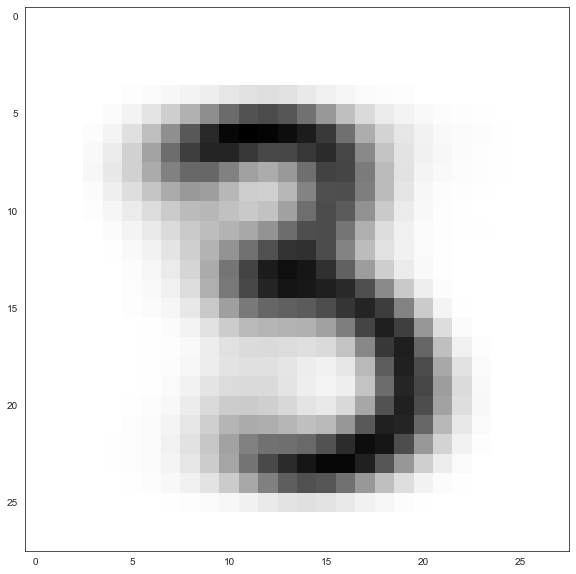

,label,perc_of_cluster
0,0,0.168209
1,1,0.252313
2,2,1.597981
3,3,64.760303
4,4,0.336417
5,5,12.531539
6,6,0.000000
7,7,0.168209
8,8,17.241379
9,9,2.943650


In [14]:
cluster = 19

plt.figure(figsize=(14,10))

plt.imshow(kmeans.cluster_centers_[cluster].reshape(28,28), cmap='binary')

plt.show()

cluster_percs(X_train, y_train, cluster, kmeans)

If you found an interesting cluster you could also plot the observations in that cluster to see in finer detail what's going on in that cluster. Choose a single cluster, then choose a random sample of observations within that cluster to plot.

In [15]:
# I chose my cluster 1
cluster = 1

print("Cluster", cluster, "contains", sum(kmeans.predict(X_train) == cluster), "observations.")

Cluster 1 contains 1578 observations.


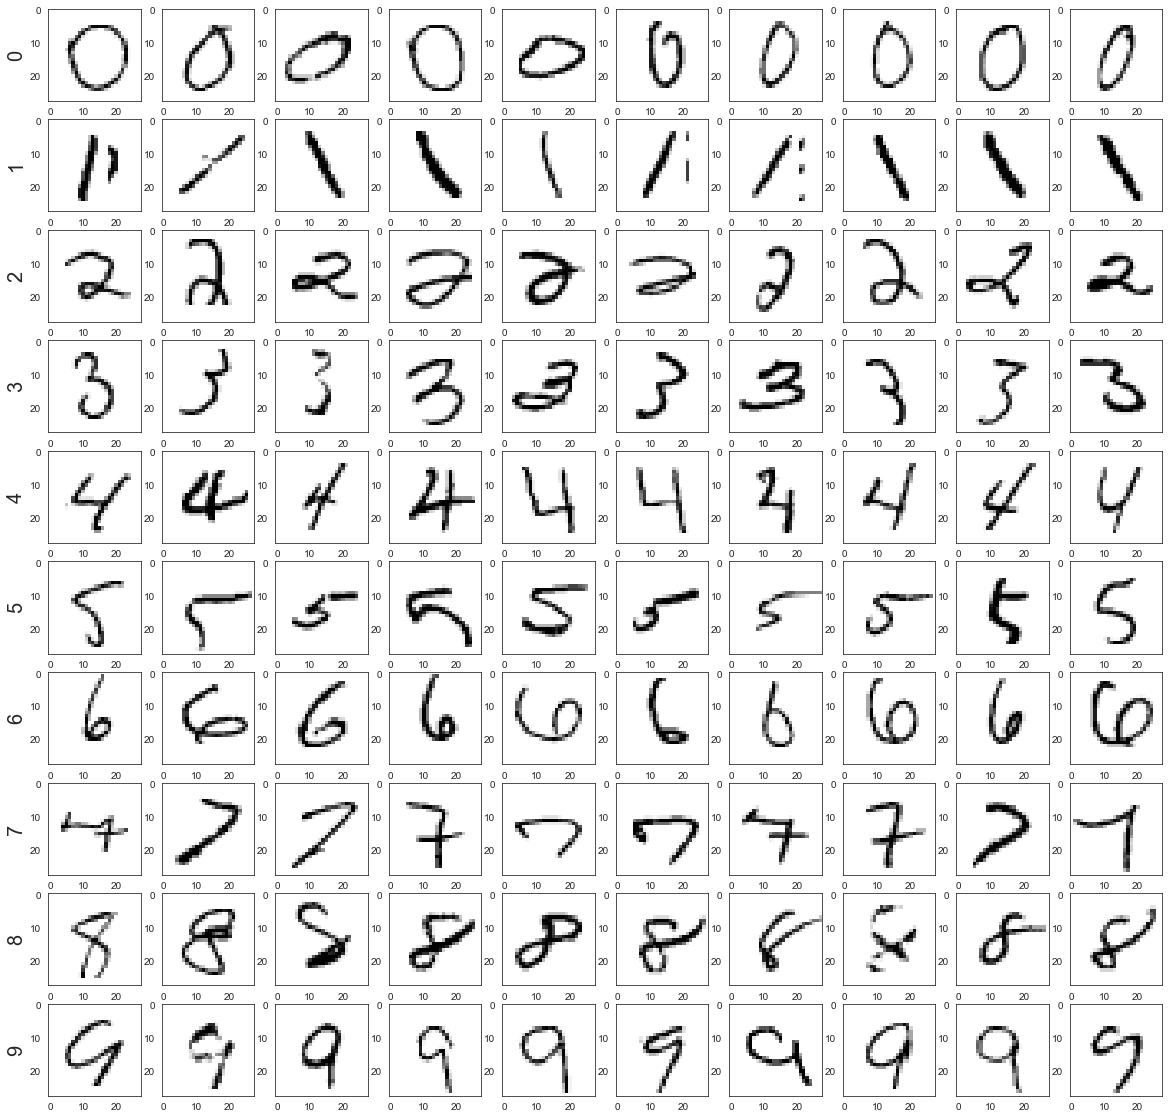

In [16]:
## I'll plot 100 of them, 10 from each digit

## getting the cluster indices and labels
cluster_index = np.where(kmeans.predict(X_train) == cluster)[0]

cluster_labels = y_train[cluster_index]

## Get indices for randomly selected digits
np.random.seed(760)
plotting_indices = {}
for i in range(10):
    if np.sum(cluster_labels==i)>=10:
        plotting_indices[i] = np.random.choice(cluster_index[cluster_labels==i], 10, replace=False)
    

fig,ax = plt.subplots(len(plotting_indices.keys()), 10, figsize=(20, 20))

for i in range(len(plotting_indices.keys())):
    digit = list(plotting_indices.keys())[i]
    for j in range(10):
        ax[i, j].imshow(X_train[plotting_indices[digit][j]].reshape(28,28), cmap='binary')
    
    
    ax[i,0].set_ylabel(digit, fontsize=20)

This cluster just seems like a real hodge-podge of digits with no discernible pattern. Perhaps we needed a different number of clusters. Also there are some really odd looking digits here.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)